### Create Artifact Set

In [16]:
import sys
sys.path.append("../")
sys.path.append("../visualize/")
from constants import *
import pandas as pd
import ast
from collections import Counter
import csv
import warnings
import h5py
import stacklineplot
import matplotlib
import scipy
from scipy.fftpack import fft, ifft
import numpy as np
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [3]:
summary = pd.read_csv(DATASET_SUMMARY)[:1000]

/mnt/home2/dlongo/.conda/envs/mne-2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
summary.head()

,file_name,patient_name,patientcode,gender,birthdate,patient_age_days,born_premature,gestatational_age_at_birth_days,bits_per_sample,start_isodatetime,...,technician,patient_additional,annotations,nk_file_reportkey,eegdata_uuid,nk_file_reportkey_uuid,studytype,base_file_name,file_source,old_file_name
0,lpch/CA0010ED_1-4+.eeghdf,"1260, Subject",2ee5afb61608548aaf92673d2ce8ea9b,Male,1990-01-01,27.187558,unknown,-1.0,16,1990-01-28 04:30:05,...,NaN,NaN,"[('REC START NEONATE EE', 1.7), ('A1+A2 OFF', ...",CA0010ED,35bd1516-6f12-512f-aeb5-40925f359fd1,eddeed09-371e-5219-b2bb-7843687fbd72,LTM,CA0010ED_1-4+.eeghdf,lpch,../lpch/longterm/CA0010ED_1-4+.eeghdf
1,lpch/CA8310Y9_1-8+.eeghdf,"1241, Subject",1815bcdb98275b62b6df98f5794c3156,Female,1990-01-01,5550.430660,unknown,-1.0,16,2005-03-13 10:20:09,...,NaN,NaN,"[('REC START DB EEG', 3.2000000000000002), ('A...",CA8310Y9,860140a1-81bb-5581-b819-2ad64adb60fd,330d2110-dd53-5e01-9400-42b45cf20fbe,LTM,CA8310Y9_1-8+.eeghdf,lpch,../lpch/longterm/CA8310Y9_1-8+.eeghdf
2,lpch/CA83110B_1-3+.eeghdf,"1215, Subject",a7e628c2c1085c1f85680c175b20d3f4,Male,1990-01-01,4897.914977,unknown,-1.0,16,2003-05-30 21:57:34,...,NaN,NaN,"[('REC START IA/DB EEG', 0.90000000000000002),...",CA83110B,4c64b1c0-b19e-5a78-9fde-88282d98d867,1929f45f-a51d-5b84-b06a-35ae09dddae8,LTM,CA83110B_1-3+.eeghdf,lpch,../lpch/longterm/CA83110B_1-3+.eeghdf
3,lpch/CA8312DO_1-9+.eeghdf,"1258, Subject",7cfe9ced26e35b85bfc2e340efc23f0a,Female,1990-01-01,482.541562,unknown,-1.0,16,1991-04-28 12:59:51,...,NaN,NaN,"[('REC START DB CAL', 0.0), ('A1+A2 OFF', 0.0)...",CA8312DO,01a790b8-a9b6-53a8-a653-03ad226eac9e,90d09f88-fa76-5759-8dca-e3fdb8d8983e,LTM,CA8312DO_1-9+.eeghdf,lpch,../lpch/longterm/CA8312DO_1-9+.eeghdf
4,lpch/CA83132S_1-2+.eeghdf,"1446, Subject",06548eef257453abb801755e54a18b75,Female,1990-01-01,764.598542,unknown,-1.0,16,1992-02-04 14:21:54,...,NaN,NaN,"[('REC START RICH-ALL E', 0.0), ('A1+A2 OFF', ...",CA83132S,5b9fb077-bfac-5251-84cc-ebccd9b73dfa,99506698-b38f-59f5-ba51-e9fc4f3b1752,LTM,CA83132S_1-2+.eeghdf,lpch,../lpch/longterm/CA83132S_1-2+.eeghdf


In [6]:
def save_annotation_counts(counts_list, filename):
    with open(filename, "w") as f:
        out = csv.writer(f)
        out.writerow(['Annotation', 'Count'])
        out.writerows(counts_list)
        
def get_annotations(summary, n=200):
    # returns list len = n sorted by most common[(artifact name, count),...]
    annotations_list = []
    for sample in summary["annotations"]:
        cur_samples_list = ast.literal_eval(sample) # must conver sample from string to list
        cur_annotations = [x[0] for x in cur_samples_list]
        annotations_list += cur_annotations
    annotations_cout_dict = Counter(annotations_list)
    return annotations_cout_dict.most_common(n)
    
counts = get_annotations(summary)
save_annotation_counts(counts, "common_annotations.csv")

In [7]:
pd.read_csv("common_annotations.csv")

,Annotation,Count
0,RhythmicBurst F3-F7,2820
1,RhythmicBurst F7-T3,2667
2,Spike T5-aT5 1.00,1660
3,Spike T3-aT3 1.00,1368
4,A1+A2 OFF,989
5,Spike T6-aT6 1.00,858
6,RhythmicBurst C3-F3,852
7,Spike T4-aT4 1.00,749
8,Spike F3-aF3 1.00,739
9,Spike O1-aO1 1.00,643


In [8]:
def check_count_statisfied(target_artifacts, cur_out_artifacts):
    for artifact_name, count in target_artifacts.items():
        if count != len(cur_out_artifacts[artifact_name]):
            # count hasn't yet been reached
            return False
    return True
        

def get_filenames_by_artifacts(target_artifacts):
    '''
     target_artifacts is {artifact name: count, ....}

    returns {artifact name : [(filename, pos), ...], ...}
    '''
    # load summary file
    summary = pd.read_csv(DATASET_SUMMARY)
#     summary = summary.sample(frac=1) # to shuffle
    
    target_artifact_names = list(target_artifacts.keys())
    out_artifacts = {}

    
    # Initial artifacts dict with empty lists
    for artifact_name in target_artifact_names:
        out_artifacts[artifact_name] = []
    
    for _, sample in summary.iterrows():
        
        # Ensure that the counts have not yet been met
        if check_count_statisfied(target_artifacts, out_artifacts):
            return out_artifacts
        
        annotations = sample["annotations"]
        filename = DATASET_PATH + sample["file_name"]
        frequency = sample["sample_frequency"]
        assert(int(frequency) == float(frequency))
        frequency = int(frequency)
        
        annoations_list = ast.literal_eval(annotations)
        
        for annoation in annoations_list:
        
            annoation_name, annoation_time = annoation
            if annoation_name in target_artifact_names:
                
                # Check to ensure the count hasn't yet been satisfied
                if len(out_artifacts[annoation_name]) < target_artifacts[annoation_name]:
                    out_artifacts[annoation_name].append((filename, int(annoation_time * frequency)))
                    
    if not (check_count_statisfied(target_artifacts, out_artifacts)):
        warnings.warn("COUNT NOT MET")
    return out_artifacts

In [9]:
target_artifacts = {
    "blink" : 220,
#     "RhythmicBurst F3-F7" : 100
#     "yawning" : 5,
#     "PHOTO 30Hz" : 5
}
artifacts = get_filenames_by_artifacts(target_artifacts)

/mnt/home2/dlongo/.conda/envs/mne-2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [15]:
print(len(artifacts["blink"]), "blinks found")

220 blinks found


In [44]:
electrode_labels = [str(s,'ascii') for s in labels]
print(electrode_labels.index("EEG Fp2"))
print(electrode_labels.index("EEG Fp1"))

1
0


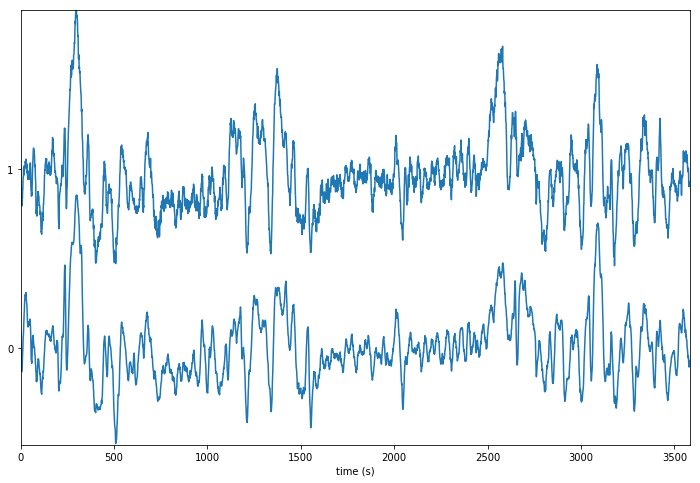

In [148]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
sample_filename, sample_pos = artifacts["blink"][7] # 3
hdf = h5py.File(sample_filename)
rec = hdf['record-0']
signals = rec['signals']
signals = signals[:, sample_pos - 84: sample_pos + 700*5]
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]
stacklineplot.stackplot(-1*signals[0:2, :], yscale=1)

In [149]:
signals.shape

(36, 3584)

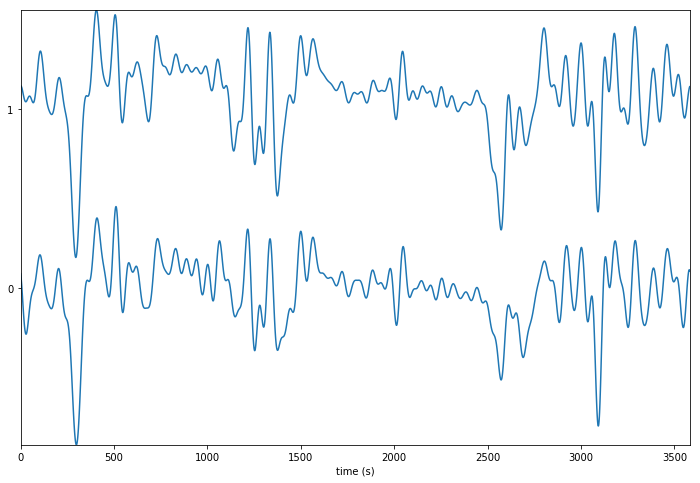

In [151]:
y = fft(signals)
cutoff_freq_start = int(0 * signals.shape[1])
cutoff_freq_end = int(.02 * signals.shape[1])
y[:, :cutoff_freq_start] = 0 # remove high frequency
y[:, cutoff_freq_end:] = 0 # remove high frequency
#y[:, :100] = 0 # remove low frequency
x_hat = ifft(y)
avg_mag = np.sum(abs(x_hat))/(x_hat.shape[1] * x_hat.shape[0])
# x_hat[abs(x_hat) < (1 * avg_mag)] = 0
stacklineplot.stackplot(1*x_hat[0:2, :], yscale=1)

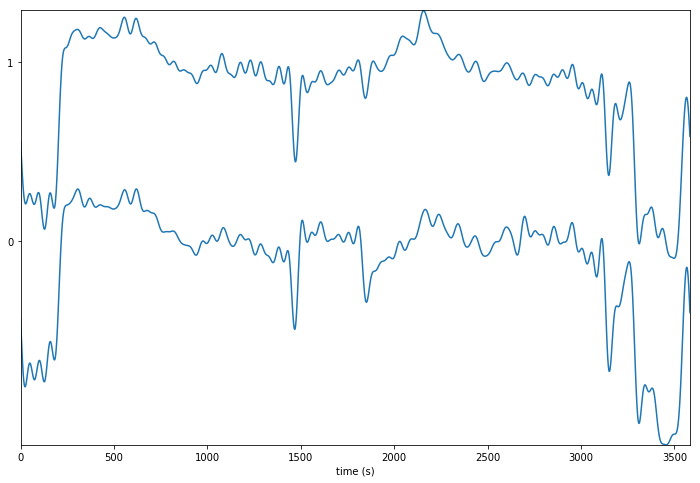

In [136]:
func = blinks_remove_extra
apply_func_to_batch(func, -1*x_hat[0:2, :])
z = blinks_remove_extra(-1*x_hat[0:2, :])
stacklineplot.stackplot(z, yscale=1)

In [135]:
def apply_func_to_batch(func, batch):
    out = []
    for i in range(batch.shape[0]):
        out.append(func(batch[i]))
    out = np.asarray(out)
    return out

def blinks_remove_extra(x):
    for i in range(5, x.shape[0] -5):
        if x[i] > .5:
            x[i-5:i] = 0
    return x